# Stellar Clusters & Equations

* Stellar clusters are groups of stars that are gravitationally bound and formed from the same molecular cloud of gas and dust. These clusters provide valuable insights into stellar evolution, as the stars within a cluster share similar ages, compositions, and distances. With the advent of increasingly powerful supercomputers, many-body gravitational systems could be studied in unprecedented detail where earlier generations had to rely on statistical analysis.
* Stellar clusters exhibit a density profile that describes how the number density of stars changes with distance from the center of the cluster. There are two main types of stellar clusters: open clusters and globular clusters.
* Here are some key concepts and formulas related to stellar clusters:
  - **Density Profile (King Model)**: Stellar clusters exhibit a density profile that describes how the number density of stars changes with distance from the center of the cluster.

  > $\rho(r) = \frac{\rho_0}{\left[1 + \left(\frac{r}{r_c}\right)^2\right]^{3/2}}$

  where:

  $p(r)$: the number density of stars at distance $r$

  $p_0$: the central number density

  $r_c$: the core radius

  - **Luminosity Function (Power-law)**: The luminosity function describes the distribution of stellar luminosities within a cluster. It is often modeled by a power-law function.

  > $\Phi(L) \propto L^{-\alpha}$

  where:

  $\Phi(L)$: the number of stars with luminosity $L$

  $\alpha$: the power-law index

  - **Mass Function (Power-law)**: The mass function describes the distribution of stellar masses within a cluster. It is often modeled by a power-law function.

  > $\xi(m) \propto m^{-\beta}$

  where:

  $\xi(m)$: the number of stars with mass $m$

  $\beta$: the power-law index

  - **Virial Theorem**: The virial theorem is used to estimate the total mass of a stellar cluster based on its observed properties. For a virialized cluster in equilibrium, the kinetic energy ($T$) is related to the potential energy ($U$).

  > $2T + U = 0$

  The total mass ($M$) can be estimated using the observed velocity dispersion $\sigma_v$ and the size of the cluster ($R$):

  $M \approx \frac{3\sigma_v^2 R}{G}$


In [1]:
%%capture
!pip install astroquery

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.constants import au,pc
from astroquery.vizier import Vizier
from astroquery.sdss import SDSS
%matplotlib inline
plt.style.use("dark_background")

In [3]:
def KingDensityProfile(radius:int or float,centralNumberDensity:int or float,coreRadius:int or float)->int or float:
  result = centralNumberDensity/((1+(radius/coreRadius)**2)**(3/2))
  return result

In [4]:
def GenerateStellarPosition(numberStars:int or float,centralNumberDensity:int or float,coreRadius:int or float)->int or float:
  radialDistance = np.random.uniform(0,2*coreRadius,numberStars) # random radial distances from the center
  angles = np.random.uniform(0,2*np.pi,numberStars) # random angles for 2D positions
  densityProfileValues = KingDensityProfile(radialDistance,centralNumberDensity,coreRadius) # density profile values at radial distances
  probabiliyDistribution = densityProfileValues/np.sum(densityProfileValues)
  selectedRadialDistance = np.random.choice(radialDistance,numberStars,p=probabiliyDistribution) # Randomly select radial distances based on the density profile
  xPositions = selectedRadialDistance*np.cos(angles)
  yPositions = selectedRadialDistance*np.sin(angles)
  return xPositions,yPositions,probabiliyDistribution

In [5]:
numberStar = 1000
centralNumberDensity = 1.0 # rho initial
coreRadius = 10.0

In [6]:
xPos,yPos,probabiliyDistribution = GenerateStellarPosition(numberStar,centralNumberDensity,coreRadius)

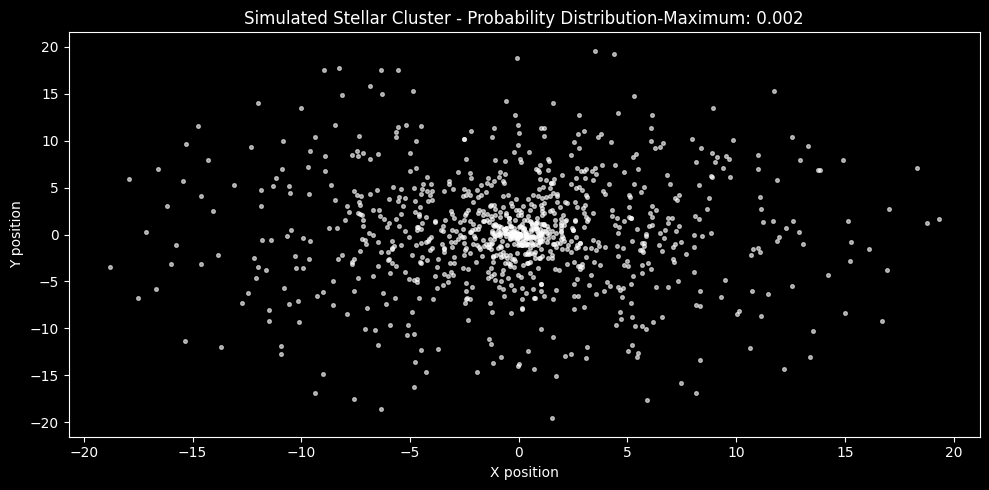

In [7]:
plt.figure(figsize=(10,5))
plt.title(f"Simulated Stellar Cluster - Probability Distribution-Maximum: {round(probabiliyDistribution.max(),3)}")
plt.scatter(xPos,yPos,s=7,color="white",alpha=0.6)
plt.xlabel("X position")
plt.ylabel("Y position")
plt.tight_layout()
plt.show()

* The most important application in astrophysics is the dynamics of dark matter halos in which galaxies, groups of galaxies, or clusters consisting of thousands of galaxies are embedded. The dark matter is treated as collisionless gas, where particles interact only via gravity. In this case, the term particle does not mean an atom or elementary particle, it just refers to an arbitrary point mass. For a total number of ($N$) particles, ~$N^2$ interactions have to be computed to determine the instantaneous accelerations of all particles directly. Since the particle positions change in time, the computation of interactions has to be carried out for a larger number of time steps.

## Example

**The evolution of the cluster was computed over a period of 100 million years and snapshots of the stellar positions and velocities were recorded every 200,000 years, resulting in 500 output files.**

In [12]:
%%capture
from google.colab import drive
drive.mount("/content/drive")

**For real data**:

https://drive.google.com/drive/folders/15nDwFGN3innp3Dgxi_jqLwQu_qR_28vw?usp=sharing

In [13]:
dataPath = "/content/drive/MyDrive/Astronomy/Project Data/star_cluster_simulation"

In [14]:
filePathCount = 250 # the first data count in file for example, for full data it must be 501
for index in range(filePathCount):
  snapshot = np.loadtxt(f"{dataPath}/output_{str(index)}.dat",dtype="float64")
  if index == 0:
    data = np.array([snapshot])
  else:
    data = np.append(data,[snapshot],axis=0)

In [15]:
data.shape

(250, 1000, 8)

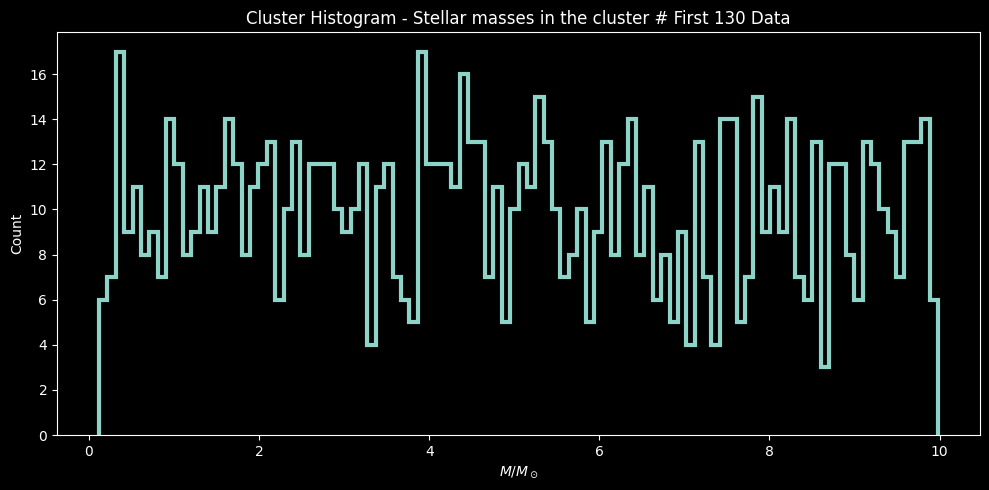

In [16]:
plt.figure(figsize=(10,5))
plt.hist(data[0,:,1],100,histtype="step",lw=3)
plt.xlabel("$M/M_\odot$")
plt.ylabel("Count")
plt.title("Cluster Histogram - Stellar masses in the cluster # First 130 Data")
plt.tight_layout()
plt.show()

In [17]:
averageMass = np.mean(data[0,:,1])
print(f"Average mass in cluster: {averageMass} (solar masses)")

Average mass in cluster: 4.984255601961191 (solar masses)


In [18]:
rDistance = np.sqrt(
    data[:,:,2]**2 + # x-coor
    data[:,:,3]**2 + # y-coor
    data[:,:,4]**2 # z-coor
)*au/pc

In [19]:
velocityMagnitude = np.sqrt(
    data[:,:,5]**2 + # velocity x-component
    data[:,:,6]**2 + # velocity y-component
    data[:,:,7]**2 # velocity <-component
)

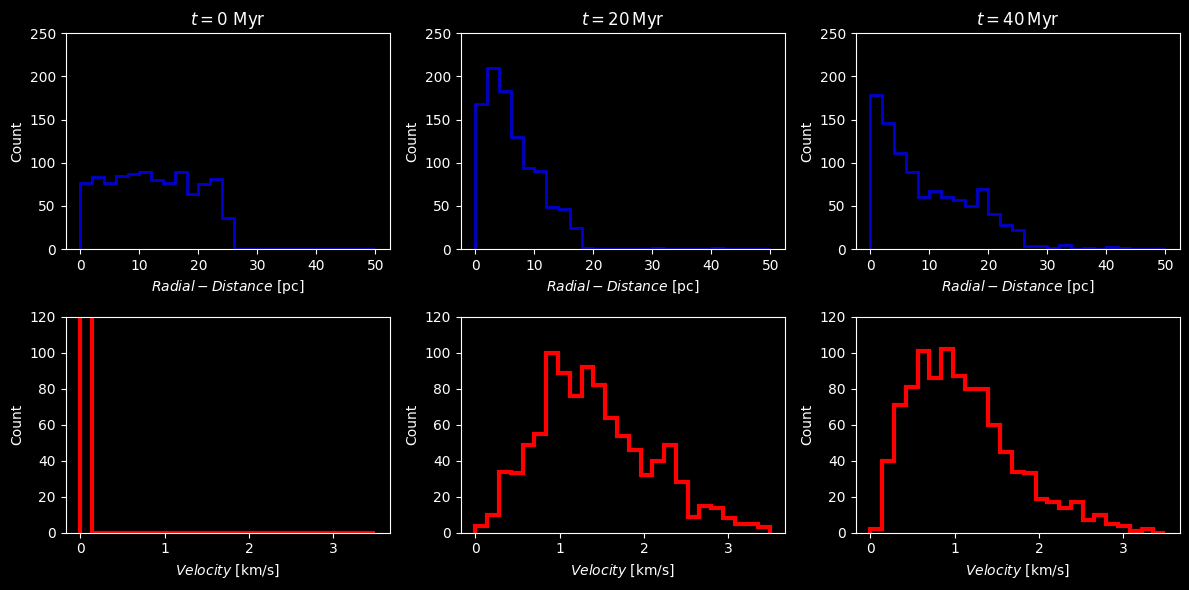

In [20]:
nBinRange = 25
plt.figure(figsize=(12,6))
plt.subplot(231)
plt.hist(rDistance[0,:],nBinRange,range=[0,50],histtype="step",lw=2,color="mediumblue")
plt.xlabel("$Radial-Distance$ [pc]")
plt.ylabel("Count")
plt.ylim(0,250)
plt.title("$t=0$ Myr")
plt.subplot(232)
plt.hist(rDistance[100,:],nBinRange,range=[0,50],histtype="step",lw=2,color="mediumblue")
plt.xlabel("$Radial-Distance$ [pc]")
plt.ylabel("Count")
plt.ylim(0,250)
plt.title("$t={:.0f}\,$Myr".format(100*0.2))
plt.subplot(233)
plt.hist(rDistance[200,:],nBinRange,range=[0,50],histtype="step",lw=2,color="mediumblue")
plt.xlabel("$Radial-Distance$ [pc]")
plt.ylabel("Count")
plt.ylim(0,250)
plt.title("$t={:.0f}\,$Myr".format(200*0.2))
plt.subplot(234)
plt.hist(velocityMagnitude[0,:],nBinRange,range=[0,3.5],histtype="step",lw=3,color="red")
plt.xlabel("$Velocity$ [km/s]")
plt.ylabel("Count")
plt.ylim(0,120)
plt.subplot(235)
plt.hist(velocityMagnitude[100,:],nBinRange,range=[0,3.5],histtype="step",lw=3,color="red")
plt.xlabel("$Velocity$ [km/s]")
plt.ylabel("Count")
plt.ylim(0,120)
plt.subplot(236)
plt.hist(velocityMagnitude[200,:],nBinRange,range=[0,3.5],histtype="step",lw=3,color="red")
plt.xlabel("$Velocity$ [km/s]")
plt.ylabel("Count")
plt.ylim(0,120)
plt.tight_layout()
plt.show()

**Since the cluster is a closed system that can neither gain nor lose energy in total, gravitational potential energy must have been transformed into kinetic energy in the process of stars concentrating near the center until an equilibrium is reached. The statement suggests that in a closed system like a star cluster, the gravitational potential energy of stars can be transformed into kinetic energy as the stars concentrate near the center, eventually reaching an equilibrium state.**

**In the context of dark matter, the virial theorem plays a role in understanding the dynamics of galaxy clusters. Dark matter is a hypothetical form of matter that does not emit, absorb, or reflect light, making it invisible and detectable only through its gravitational effects. The presence of dark matter is inferred from its gravitational influence on visible matter, such as stars and gas.**

**To examine the evolution in more detail, we compute averaged quantities for all stars at a given time. In the following, we consider root mean square (RMS) radial distances and velocities:**

In [21]:
radialDistancesRMS = np.sqrt(np.mean(rDistance**2,axis=1))
velocityRMS = np.sqrt(np.mean(velocityMagnitude**2,axis=1))

In [22]:
medianValue = np.median(rDistance,axis=1)

In [23]:
timeInterval = np.linspace(0,100,filePathCount)

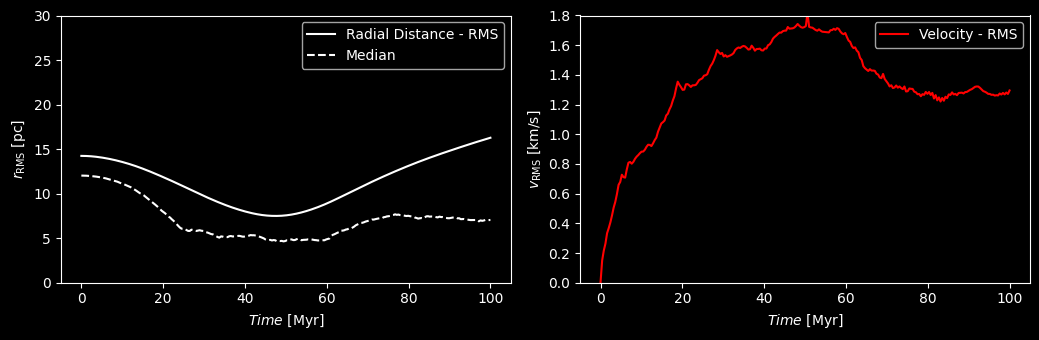

In [24]:
plt.figure(figsize=(10.5,3.5))
plt.subplot(121)
plt.plot(timeInterval,radialDistancesRMS,color="white",label="Radial Distance - RMS")
plt.plot(timeInterval,medianValue,color="white",ls="dashed",label="Median")
plt.xlabel("$Time$ [Myr]")
plt.ylabel("$r_\mathrm{RMS}$ [pc]")
plt.legend()
plt.ylim(0,30)
plt.subplot(122)
plt.plot(timeInterval,velocityRMS,color="red",label="Velocity - RMS")
plt.xlabel("$Time$ [Myr]")
plt.ylabel("$v_\mathrm{RMS}$ [km/s]")
plt.ylim(0,1.8)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
def SimulateStarCluster(darkMatterFactor:int or float)->tuple:
  xPositions = data[:,:,2] # x-coor
  yPositions = data[:,:,3] # y-coor
  gravitationalPotential = -1 / np.sqrt(xPositions**2+yPositions**2) # Calculate gravitational potential energy
  darkMatterPotential = darkMatterFactor*gravitationalPotential # Dark matter contribution (additional mass)
  totalPotential = gravitationalPotential+darkMatterPotential # Total potential energy
  kineticEnergy = -0.5*totalPotential # Kinetic energy (set to maintain virial theorem)
  return xPositions,yPositions,totalPotential,kineticEnergy

In [26]:
darkMatterFactor = 2.0 # means that the mass attributed to dark matter is twice the mass of the visible matter

In [27]:
xPos,yPos,potentialTotal,ke = SimulateStarCluster(darkMatterFactor)

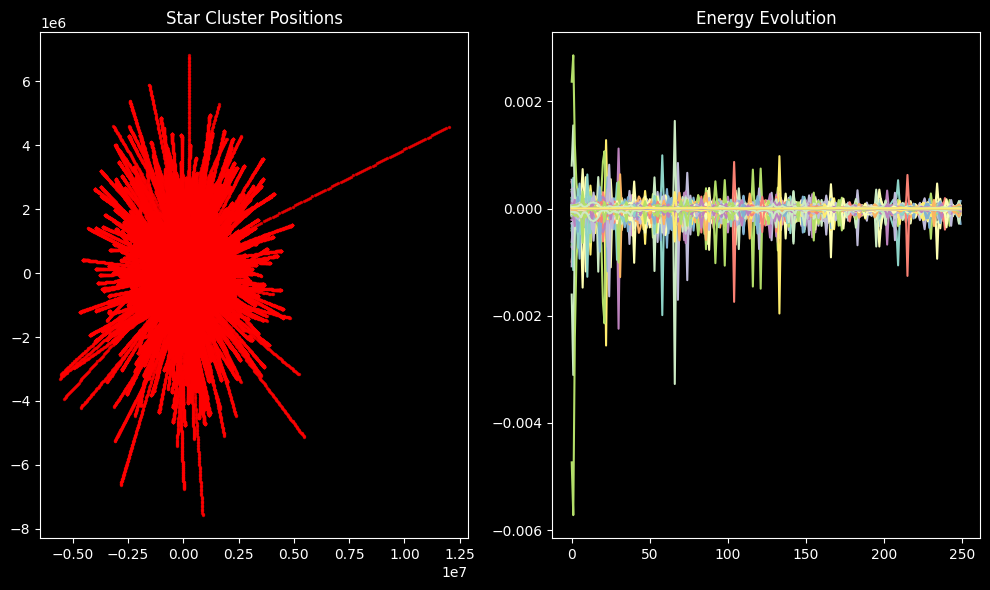

In [28]:
# Plot positions and potential energy
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(xPos,yPos,s=2,color='red',alpha=0.7)
plt.title('Star Cluster Positions')
plt.subplot(1,2,2)
plt.plot(potentialTotal,label='Total Potential Energy')
plt.plot(ke,label='Kinetic Energy')
plt.title('Energy Evolution')
plt.tight_layout()
plt.show()

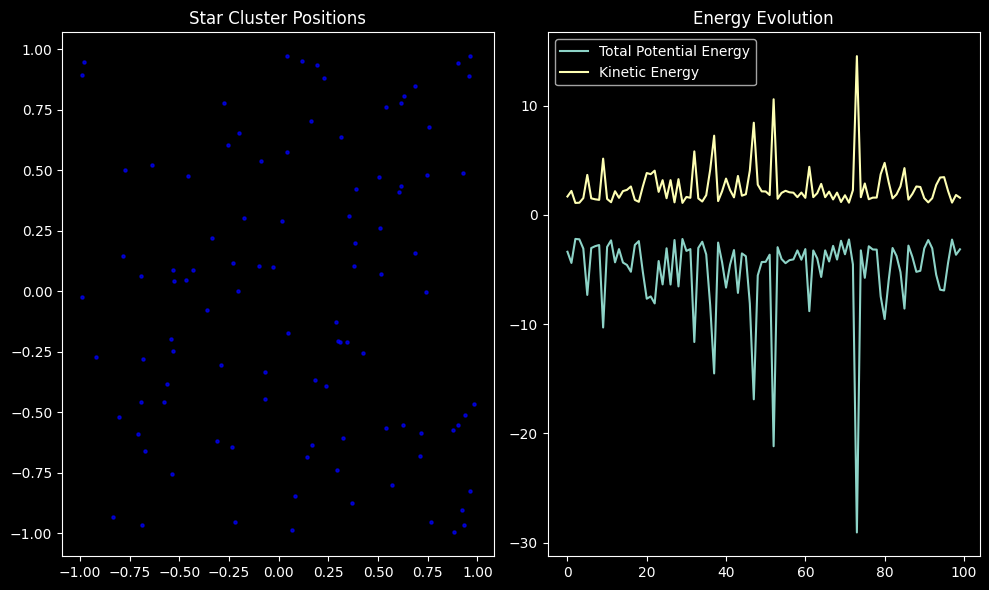

In [29]:
# Simple One - Just For Example
def simulate_star_cluster(num_stars:int or float, dark_matter_factor:int or float):
    # Generate random positions for stars
    x_positions = np.random.uniform(-1,1,num_stars)
    y_positions = np.random.uniform(-1,1,num_stars)
    # Calculate gravitational potential energy
    gravitational_potential = -1 / np.sqrt(x_positions**2+y_positions**2)
    # Dark matter contribution (additional mass)
    dark_matter_potential = dark_matter_factor*gravitational_potential
    # Total potential energy
    total_potential = gravitational_potential+dark_matter_potential
    # Kinetic energy (set to maintain virial theorem)
    kinetic_energy = -0.5*total_potential
    return x_positions,y_positions,total_potential,kinetic_energy
# Set parameters
num_stars = 100
dark_matter_factor = 2.0
# Simulate star cluster
x_positions,y_positions,total_potential,kinetic_energy = simulate_star_cluster(num_stars,dark_matter_factor)
# Plot positions and potential energy
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(x_positions,y_positions,s=5,color='blue',alpha=0.7)
plt.title('Star Cluster Positions')
plt.subplot(1,2,2)
plt.plot(total_potential,label='Total Potential Energy')
plt.plot(kinetic_energy,label='Kinetic Energy')
plt.title('Energy Evolution')
plt.legend()
plt.tight_layout()
plt.show()

# Understanding Dark Matter

* Dark matter is a form of matter that does not emit, absorb, or reflect light, making it invisible to current astronomical instruments. It is significant because it is thought to make up about 85% of the universe's total mass.
* Dark matter's presence is inferred from its gravitational effects on visible matter, radiation, and the large-scale structure of the universe. For example, galaxies would fly apart if they were only held together by the gravity of the visible matter.
 ## Proving and Visualizing Dark Matter

 * A common method to visualize dark matter is through gravitational lensing in galaxy clusters. The Bullet Cluster (1E 0657-56) is a famous example. It's a pair of colliding galaxy clusters whose interaction provides evidence for dark matter.

## Example with random values

In [30]:
from astropy.modeling.models import Sersic2D

In [38]:
amplitude = 1 # amplitude: replace with actual data
effectiveRadius = 5 # effective radius: replace with actual data
sersicIndex = 4 # Sersic index (n=4 for de Vaucouleurs profile)

In [46]:
xValues = np.arange(-10,11,1)
yValues = np.arange(-10,11,1)
gridX,gridY = np.meshgrid(xValues,yValues)

**The Sérsic model is a mathematical function that describes how the intensity of light varies with distance from the center of a galaxy or other astronomical object. Named after Argentine astronomer José Luis Sérsic, who first described it in the 1960s, the Sérsic profile is widely used in astrophysics to model the brightness profiles of galaxies.**

> $I(r) = I_e \exp \left[ -b_n \left( \left( \frac{r}{R_e} \right)^{\frac{1}{n}} - 1 \right) \right]$

where:

$I(r)$ is the intensity of light at a distance $r$ from the center of the galaxy

$I_e$ is the intensity at the effective radius $R_e$

$R_e$ is the effective radius, which encloses half of the total light emitted by the galaxy

$n$ is the Sérsic index, a parameter that describes the shape of the profile

$b_n$ is a constant that depends on $n$ and is chosen so that $R_e$ encloses half of the total light

In [47]:
sersicModel = Sersic2D(amplitude=amplitude,r_eff=effectiveRadius,n=sersicIndex,x_0=0,y_0=0)

In [48]:
massDistrubition = sersicModel(gridX,gridY)

In [50]:
massDistrubition.shape

(21, 21)

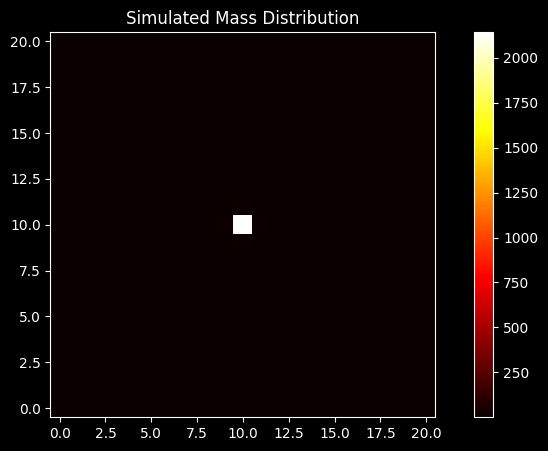

In [51]:
plt.figure(figsize=(10,5))
plt.imshow(massDistrubition,origin="lower",cmap="hot")
plt.colorbar()
plt.title("Simulated Mass Distribution")
plt.show()

In [53]:
# Define your query parameters (e.g., a specific location in the sky)
# Here, we're using an example set of coordinates
coordinateSky = SkyCoord(ra=180,dec=0,unit=(u.deg,u.deg),frame="icrs")

In [54]:
coordinateSky

<SkyCoord (ICRS): (ra, dec) in deg
    (180., 0.)>

In [ ]:
%%capture
# This example queries a circular region with a radius of 0.1 degrees
SDSSQuery = SDSS.query_region(coordinateSky,radius=0.1*u.deg,spectro=True)

In [56]:
SDSSQuery

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,bytes7
179.935109694095,0.0378453504726863,1237674650465534622,6793,301,4,129,0.0001499979,3843,55278,78,4326854871024115712,v5_10_0
179.936477165207,-0.0896966475001664,1237648721230692432,756,301,3,428,-5.946096e-05,2892,54552,273,3256177648627378176,26
179.981204764805,0.0453462952404832,1237674650465534761,6793,301,4,129,0.4917682,3843,55278,39,4326844150785744896,v5_10_0
180.022223785024,-0.0748523926871167,1237648721230758014,756,301,3,429,0.0814418,285,51930,502,321019494539487232,26
180.022223785024,-0.0748523926871167,1237648721230758014,756,301,3,429,0.08145328,285,51663,511,321021963961133056,26
179.921125701661,0.00221383552440058,1237674650465534144,6793,301,4,129,9.961602e-05,2892,54552,358,3256201013249468416,26
180.032530023465,0.0383925134673132,1237674650465599583,6793,301,4,130,-9.780023e-06,2917,54556,392,3284357856836478976,26
179.928178814,-0.0478116591307641,1237648721230692532,756,301,3,428,0.1080382,285,51663,492,321016741280901120,26
179.928178814,-0.0478116591307641,1237648721230692532,756,301,3,428,0.1081091,285,51930,495,321017570394138624,26


In [59]:
SDSSSersicIndex = 3 # Sérsic index from SDSS
effectiveRadius = 5 # Effective radius from SDSS in kpc (or another unit)
amplitudeSDSS = 1 #  Amplitude, you might need to derive this from the data

In [66]:
x,y = np.meshgrid(np.linspace(-5,5,1000), np.linspace(-5,5,1000))
sersicModel = Sersic2D(amplitude=amplitudeSDSS,r_eff=effectiveRadius,n=SDSSSersicIndex,x_0=0,y_0=0)
lightProfile = sersicModel(x,y)

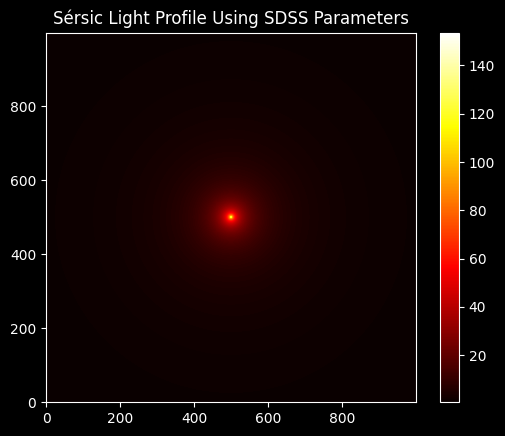

In [67]:
# Plot the light profile
plt.imshow(lightProfile,origin='lower',cmap='hot')
plt.colorbar()
plt.title('Sérsic Light Profile Using SDSS Parameters')
plt.show()

# Lensing Simulation

* The core idea behind such a simulation is to compute how light from a background source is bent when it passes through the gravitational field of a massive object (like a galaxy cluster). This process is described by the theory of general relativity.
* The basic lens equation can be expressed as:
> $\beta = \theta - \frac{D_{ls}}{D_s} \Delta \alpha(\theta)$

where:

$\beta$: true angular position of the source

$\theta$: observed angular position of the image

$D_{ls}$: angular diameter distance between the lens and the source

$D_s$: angular diameter distance between the observer and the source

$\Delta \alpha(\theta)$: the deflection angle, which depends on the mass distribution of the lensing object

## Simplified Lens Equation for a Point Mass
* This version is often employed in educational contexts or basic simulations due to its simplicity.
> $\theta = \beta - \frac{4GM}{c^2D}$

where:

$\theta$: the observed angular position of the image

$\beta$: the true angular position of the source

$M$: the mass of the lensing object (e.g., a galaxy or black hole)

$c$: the speed of light

$D$: the distance from the lens to the source

$G$: the gravitational constant

In [70]:
def LensEquation(beta:int or float,mass:int or float,distance:int or float)->int or float:
  """
    Simplified lens equation.
    beta: position of the source.
    mass: mass of the lensing object.
    distance: distance between the lens and the source.
    Returns the lensed position.
  """
  G = 6.67430e-11  # Gravitational constant
  c = 299792458  # Speed of light in m/s
  result = beta-(4*G*mass/(c**2*distance))
  return result

In [91]:
mass = 1e20 # Mass of the lens (in kg)
distance = 1e32  # Distance to the lens (in m)

In [92]:
# Create a grid for the source
xSource = np.linspace(-5,5,100)
ySource = np.linspace(-5,5,100)
gridX,gridY = np.meshgrid(xSource,ySource)

In [93]:
# Create a simple source image (e.g., a circular source)
sourceImage = np.exp(-gridX**2,gridY**2)

In [94]:
xLensed = LensEquation(gridX,mass,distance)
yLensed = LensEquation(gridY,mass,distance)

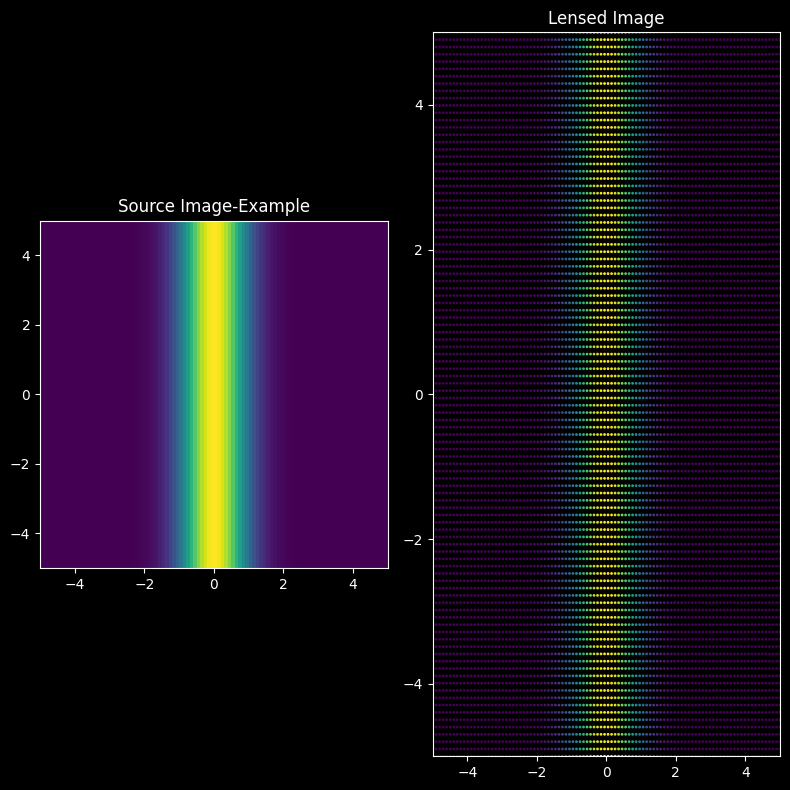

In [95]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(sourceImage,extent=[-5,5,-5,5])
plt.title("Source Image-Example")
plt.subplot(1,2,2)
plt.scatter(xLensed,yLensed,c=sourceImage,s=1)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title("Lensed Image")
plt.tight_layout()
plt.show()

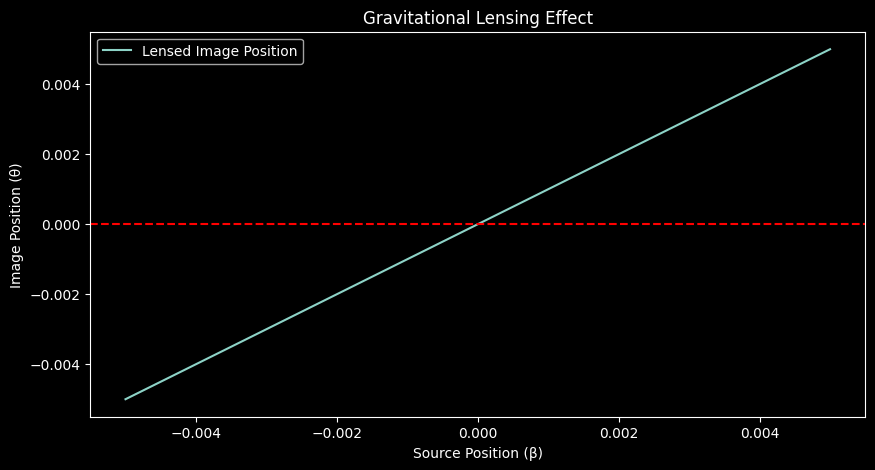

In [96]:
# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
c = 299792458  # Speed of light in m/s
# Example data (to be replaced with real data)
M = 1e14  # Mass of the lensing object in kg
D = 1e22  # Distance to the lensing object in meters
beta = np.linspace(-0.005, 0.005, 100)  # Source positions in radians
# Lens equation
theta = beta-((4*G*M)/(c**2*D))
# Plotting
plt.figure(figsize=(10,5))
plt.plot(beta,theta,label='Lensed Image Position')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Source Position (β)')
plt.ylabel('Image Position (θ)')
plt.title('Gravitational Lensing Effect')
plt.legend()
plt.show()